# **Olympics Data Analysis Project**





# Step 1: Data Preparation

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Summer-Olympic-medals-1976-to-2008.csv to Summer-Olympic-medals-1976-to-2008.csv


In [83]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [8]:
# Read CSV
data = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv',encoding='latin-1')
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


**1.1 Data Cleaning and Exploring**

In [9]:
data.shape                            # (15433, 11)
# print(data.info())

# Check for duplicates
data.duplicated().sum().item()            # 117

# Drop the duplicates
data.drop_duplicates(inplace=True)

# Check the row of missing values
data[data.isnull().any(axis=1)]

# Drop the missing values
data.dropna(inplace=True)

# Convert 'Year' Column to int type
data['Year'] = data['Year'].astype(int)

print(data['Medal'].value_counts())

# data[(data['Country'] == 'India') & (data['Gender'] == 'Women')]
# data[data['Country'] == 'Saudi Arabia']

data[(data['Year'] >= 2007) & (data['Sport'] == 'Aquatics') & (data['Country_Code'] == 'USA') & (data['Medal'] != 'Bronze')].tail()

Medal
Bronze    5258
Gold      5041
Silver    5016
Name: count, dtype: int64


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
13724,Beijing,2008,Aquatics,Water polo,water polo,"POWERS, Jeffrey",Men,USA,United States,M,Silver
13729,Beijing,2008,Aquatics,Water polo,water polo,"BAILEY, Ryan",Men,USA,United States,M,Silver
13730,Beijing,2008,Aquatics,Water polo,water polo,"WENGER, Lauren",Women,USA,United States,W,Silver
13733,Beijing,2008,Aquatics,Water polo,water polo,"BROOKS, Brandon",Men,USA,United States,M,Silver
13734,Beijing,2008,Aquatics,Water polo,water polo,"VILLA, Brenda",Women,USA,United States,W,Silver


# Step 2: Exploratory Data Analysis (EDA)

**2.1 Medals by years**

In [87]:
data.groupby('Year')['Medal'].count()

,Medal
Year,
1976,1305
1980,1386
1984,1459
1988,1546
1992,1705
1996,1859
2000,2015
2004,1998
2008,2042


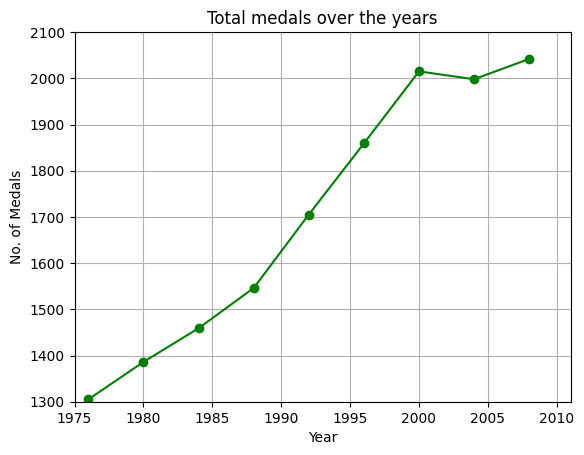

In [10]:
medal_by_year = data.groupby('Year')['Medal'].count()                     # Total No. of medals in a year
medal_by_year.plot(kind='line',marker='o',color='g')                      # or plt.plot(x,y)

plt.xlim(1975,2011)                         # or plt.xticks(ticks=range(1975,2011,5))
plt.ylim(1300,2100)                         # or plt.yticks(ticks=range(1300,2101,100))

plt.xlabel('Year')
plt.ylabel('No. of Medals')

plt.title('Total medals over the years')
plt.grid()
plt.show()

**2.2 Medals by Countries**

In [114]:
data.groupby('Country')['Medal'].count()

,Medal
Country,
Afghanistan,1
Algeria,14
Argentina,153
Armenia,9
Australia,798
...,...
Virgin Islands*,1
West Germany,345
Yugoslavia,278


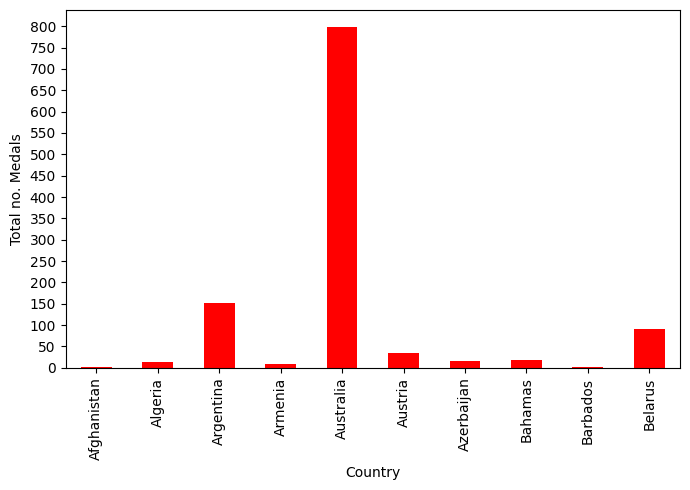

In [11]:
medal_by_country = data.groupby('Country')['Medal'].count()         # Medals wrt to Countries (ascending order by default)
top_10_Countries = medal_by_country.head(10)                             # Countries names (Top 10)
plt.figure(figsize=(7,5))

medal_by_country.head(10).plot(kind='bar',color='red')

plt.xticks(ticks=range(10),labels=top_10_Countries.index, rotation=90)
plt.yticks(ticks=range(0,801,50))

plt.xlabel('Country')
plt.ylabel('Total no. Medals')

plt.tight_layout()
plt.show()

**2.3 Top Performing Countries**

,Medal
Country,
United States,1992
Soviet Union,1021
Australia,798
Germany,691
China,679
Russia,638
East Germany,626
Italy,486
Romania,482


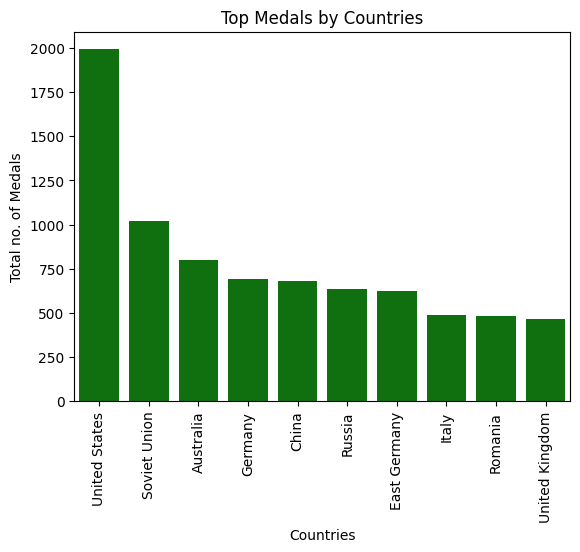

In [12]:
top_performance = data.groupby('Country')['Medal'].count().sort_values(ascending=False)
top_countries = top_performance.head(10)

sns.barplot(x=top_countries.index, y=top_countries.values, color='Green')

plt.xticks(rotation=90)

plt.xlabel('Countries')
plt.ylabel('Total no. of Medals')

plt.title('Top Medals by Countries')

top_countries

**2.4 Top Athletes With Most Medals**

In [13]:
data.groupby('Athlete')['Medal'].count().sort_values(ascending=False)

,Medal
Athlete,
"PHELPS, Michael",16
"TORRES, Dara",12
"NEMOV, Alexei",12
"FISCHER, Birgit",12
"THOMPSON, Jenny",12
...,...
"ZVONAREVA, Vera",1
"ZVYAGINTSEV, Viktor",1
"ZWEHL, Julia",1


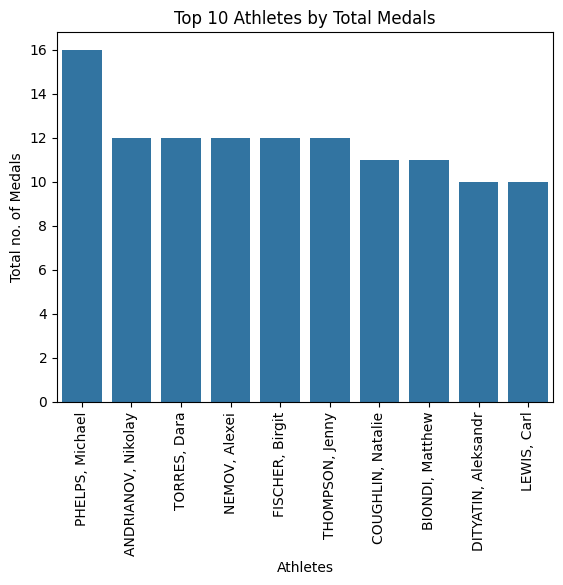

In [14]:
Top_Athlete = data['Athlete'].value_counts().head(10)

sns.barplot(x=Top_Athlete.index, y=Top_Athlete.values)

plt.xticks(rotation=90)

plt.xlabel('Athletes')
plt.ylabel('Total no. of Medals')

plt.title("Top 10 Athletes by Total Medals")
plt.show()

**2.5 Gender Distribution of Medals**

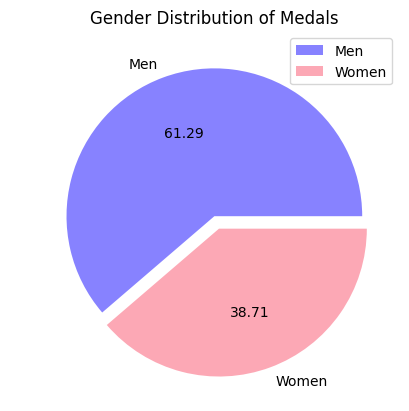

In [15]:
gender_distribution = data.groupby('Gender')['Medal'].count()

gender_distribution.plot(kind='pie', autopct='%.2f', colors=['#8782FF','#FCA8B5'], explode=[0,0.09])

plt.ylabel(' ')

plt.title('Gender Distribution of Medals')
plt.legend()
plt.show()

**2.6 Medals by Sport**

In [16]:
data.groupby('Sport')['Medal'].count().sort_values(ascending=False)

,Medal
Sport,
Aquatics,2210
Athletics,1523
Rowing,1377
Hockey,816
Gymnastics,783
Handball,780
Volleyball,695
Canoe / Kayak,672
Football,669


In [17]:
data.groupby(['Sport','Medal']).size()

Sport          Medal 
Aquatics       Bronze    717
               Gold      757
               Silver    736
Archery        Bronze     54
               Gold       54
                        ... 
Weightlifting  Gold      104
               Silver    104
Wrestling      Bronze    189
               Gold      172
               Silver    172
Length: 84, dtype: int64

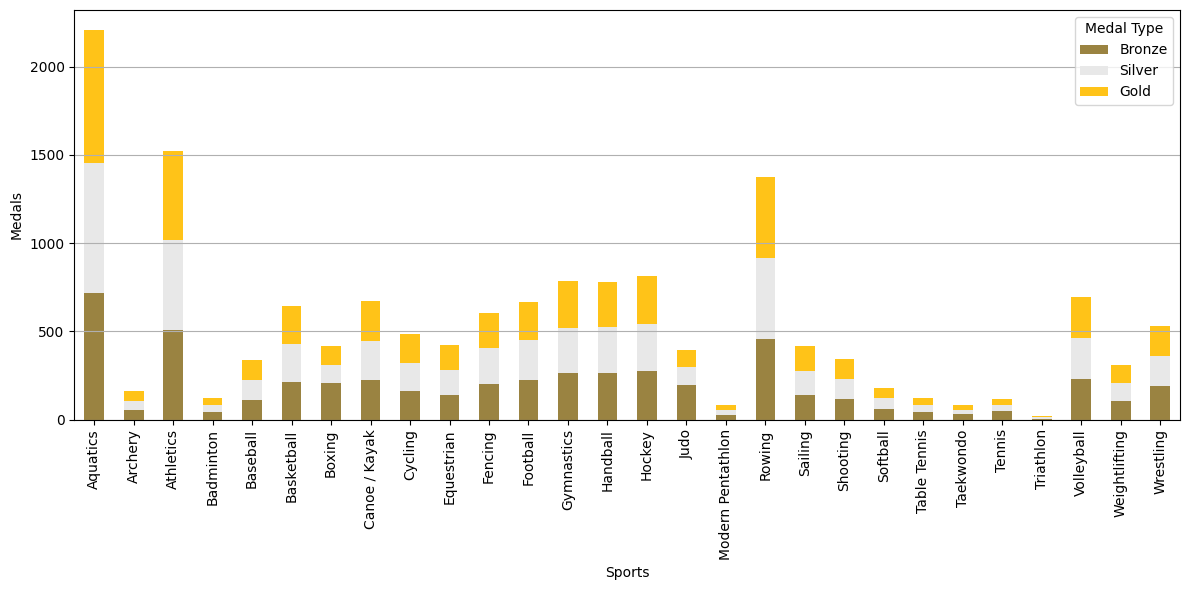

In [18]:
medals_by_sport = data.groupby(['Sport','Medal']).size().unstack().reindex(columns=['Bronze','Silver','Gold']).fillna(0)

medals_by_sport.plot(kind='bar',stacked=True,color=['#9A8341','#E8E8E8','#FFC318'],figsize=(12,6))

plt.xlabel('Sports')
plt.ylabel('Medals')

plt.grid(axis='y')
plt.legend(title='Medal Type')
plt.tight_layout()
plt.show()

# Step 3: Predictive Modelling

**3.1 Encode Categorical Variables**

Objective: Train a machine learning model to predict whether an athlete will win a
 medal based on their country, sport, and other attributes.

In [87]:
# Create Target Column
data['Medal_Won'] = data['Medal'].notnull().astype(int)

# Encode Categorical Columns
data_Cleaned = data                          # Creating a duplicate Data Frame

le = LabelEncoder()                         # Initialization of Le Object (for encoding)
data_Cleaned['Country'] = le.fit_transform(data_Cleaned['Country'])
data_Cleaned['Country_Code'] = le.fit_transform(data_Cleaned['Country_Code'])
data_Cleaned['Sport'] = le.fit_transform(data_Cleaned['Sport'])
data_Cleaned['Gender'] = le.fit_transform(data_Cleaned['Gender'])
data_Cleaned['Event_gender'] = le.fit_transform(data_Cleaned['Event_gender'])
data_Cleaned['Discipline'] = le.fit_transform(data_Cleaned['Discipline'])

# Dependent Variables
X = data_Cleaned[['Country','Country_Code','Sport','Gender','Event_gender','Discipline']]

# Independent Variable
y = data_Cleaned['Medal_Won']

# Split dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)          # 20% Test and 80% Train

# Train Model (Random Forest Classifier)
model = RandomForestClassifier()

model.fit(X_train, y_train)                              # Train the model using training data to learn the relationship between target and features

y_pred = model.predict(X_test)                                # Predict the test data using trained model (RandomForest model)

print('Accuracy',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3063

    accuracy                           1.00      3063
   macro avg       1.00      1.00      1.00      3063
weighted avg       1.00      1.00      1.00      3063



Since every Athlete has won a Medal lets try to find Multi-class model for medal types (i.e Bronze, Silver, Gold)

In [88]:
data['Medal'].value_counts()

,count
Medal,
Bronze,5258
Gold,5041
Silver,5016


Accuracy:  0.6953966699314398
              precision    recall  f1-score   support

      Bronze       0.71      0.69      0.70      1052
        Gold       0.70      0.73      0.71      1008
      Silver       0.68      0.67      0.67      1003

    accuracy                           0.70      3063
   macro avg       0.70      0.70      0.70      3063
weighted avg       0.70      0.70      0.70      3063



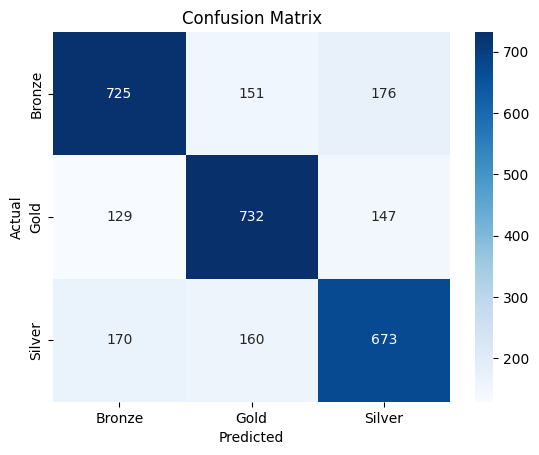

In [94]:
# Encoding Categorical features
# features = ['Country','Country_Code','Sport','Discipline','Gender','Event_gender','Year']
le = LabelEncoder()
data_Cleaned['Country'] = le.fit_transform(data_Cleaned['Country'])
data_Cleaned['Country_Code'] = le.fit_transform(data_Cleaned['Country_Code'])
data_Cleaned['Sport'] = le.fit_transform(data_Cleaned['Sport'])
data_Cleaned['Gender'] = le.fit_transform(data_Cleaned['Gender'])
data_Cleaned['Event_gender'] = le.fit_transform(data_Cleaned['Event_gender'])
data_Cleaned['Discipline'] = le.fit_transform(data_Cleaned['Discipline'])
data_Cleaned['Year'] = le.fit_transform(data_Cleaned['Year'])

# Dependent Variables
X = data[['Country','Country_Code','Sport','Gender','Event_gender','Discipline','Year']]

# Independent Variable
y = data_Cleaned['Medal']               # Multi-Class target

# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)          # 'stratify=y' ensure that the distribution of the target variable y is preserved

# Train Model (Random Forest)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)                                   # Training the model with training data

y_pred = rf.predict(X_test)                                # Predicting the test data using trained model

print('Accuracy: ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualizing Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Bronze','Gold','Silver'])

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Bronze','Gold','Silver'], yticklabels=['Bronze','Gold','Silver'], cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Conclusion Summary**

In this project, we explored Olympic medal data from 1976 to 2008 with the goal of uncovering patterns and building a model to predict the type of medal won by athletes. Through data analysis, we identified the top-performing countries and athletes, observed how medal counts have changed over the years, and examined gender participation across different sports. Visualizations helped bring out these insights clearly, showing countries like the USA and Soviet Union consistently at the top, while sports like Aquatics and Archery dominated in medal counts.

To take the analysis further, we built a multi-class classification model using a Random Forest Classifier to predict whether an athlete would win a gold, silver, or bronze medal. Using features like country, sport, discipline, gender, event gender, and year, the model achieved an accuracy of around 70%. It performed consistently across all medal types, with gold medals having the highest recall. The confusion matrix showed that most predictions were correct, with some understandable overlap between similar medal types like silver and bronze.

Overall, the project met its objectives both in terms of insightful analysis and predictive modeling. With additional athlete-level data such as age, prior experience, or performance stats, the model's accuracy could likely be improved even further